In [1]:
import numpy as np
import pandas as pd
import random
import shap
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

In [10]:
%pip install shap


The following command must be run outside of the IPython shell:

    $ pip install shap

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [52]:
#individuals
n = 2000
#loci
m = 100


#here every matrix entree has to be zero or one, with having a f_i probability to get selected
#frequency of alleles, random uniform distribution between 0 and 1, with m samples
f_M = np.random.uniform(0,1,m)

#initialize G matrix
# G = np.zeros((n, m));

# #will be used to flip a coin based on f_i
# #higher f_i frequency = higher chance of returning true
# def loci_frequency_flip(f_i):
#     return random.random() < f_i

# #use this if I wanted to populate entire G matrix
# #k are the colums(loci)
# for k in range (0, len(G[0])):
#     # j are the rows(individuals)
#     for j in range (0, len(G)):
#         #frequency of loci k we are currently on
#         if(loci_frequency_flip(f_M[k])):
#             G[j,k] = 1

G = np.random.binomial(n=2,p = f_M, size =  (n,m))

# If 0, independently standardize each feature, otherwise (if 1) standardize each sample, so choosing 0 
# to do column wise scaling
G = preprocessing.scale(G, axis=0)
# choose random SNP
loci =random.randint(0,m-1)

#select SNP
SNP = G[:,loci]

#preview of the data
print(SNP[0:30])

[-0.52792621 -0.52792621 -0.52792621  1.55052345 -0.52792621 -0.52792621
  1.55052345 -0.52792621 -0.52792621 -0.52792621 -0.52792621 -0.52792621
 -0.52792621 -0.52792621  1.55052345 -0.52792621 -0.52792621 -0.52792621
 -0.52792621 -0.52792621  1.55052345 -0.52792621  1.55052345 -0.52792621
 -0.52792621 -0.52792621  3.62897311 -0.52792621 -0.52792621 -0.52792621]


In [53]:

# mean and standard deviation
H=0
#assumes that we are making a Y_j for every individual in the SNP and 
#in each loop we choose a e_j for that person
def Simulate_Phenotype_PerPerson(SNP,var_e,var_g):
    
    #rows are the loci so each person has a row of different loci
    individuals = len(SNP)
    
    #where columns are the individuals
    mean = 0 
    
    #because we are given variance and python random.normal only accepts std, we need to convert variance to std
    sigma_e = sqrt(var_e)
    sigma_b = sqrt(var_g)
    
    #b_i = loci effect on phenotype
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1));
    
    for k in range(0, individuals):
        #each individual will have a random e_j(noise) value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    return Y_n,H


In [54]:
Y,H = Simulate_Phenotype_PerPerson(SNP,.3,.7)

In [55]:
# function assumes that for each person j in M we make a phenotype Y_j
print('Phenotypes for loci '+str(loci)+' are '+str(Y[0:30]))

Phenotypes for loci 22 are [[-0.39782873]
 [ 0.28188182]
 [-0.43748361]
 [-0.66374251]
 [ 0.61214089]
 [ 0.64294434]
 [-0.29599585]
 [ 0.48618209]
 [ 0.42922587]
 [ 0.09327335]
 [ 0.26936356]
 [-0.32858144]
 [-0.52790199]
 [-0.26430249]
 [-1.59433489]
 [ 0.75560777]
 [ 0.44742532]
 [-0.70392982]
 [ 0.53785251]
 [ 0.13690266]
 [-1.11923004]
 [-0.89165393]
 [-1.35486111]
 [-0.63804772]
 [ 0.70716697]
 [ 0.69897994]
 [-2.12187295]
 [ 1.16086842]
 [-0.18682944]
 [-0.19275656]]


In [56]:
G = np.append(G, Y, axis=1)

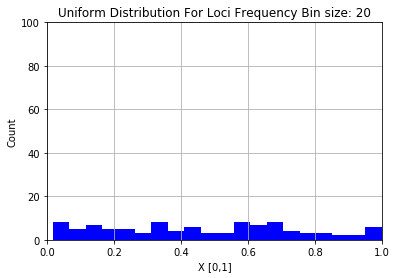

In [57]:
#use this to see distribution of f_i frequency
bin_size = 20
count, bins, ignored = plt.hist(f_M, 20, facecolor='blue') 

plt.xlabel('X [0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution For Loci Frequency Bin size: "+str(bin_size))
plt.axis([0, 1, 0, 100]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)

In [58]:
#starting machine learning classification
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

In [59]:
#split data into test and train
X = G[:,0:len(G[0])-2]

#last column is the appended Y vector we predicted
y = G[:,len(G[0])-1]

#split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [60]:
linReg = LinearRegression()  

In [61]:
#training the algorithm
linReg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
#regression model of SVM with RBF kernal
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [62]:
# train the model
#svr_rbf.fit(x_train, y_train)

#test the model on test data
y_predict = linReg.predict(x_test)

In [63]:
#Evaluate the regression model
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predict), 2)) 
print("Root Mean squared error =", sqrt(round(sm.mean_squared_error(y_test, y_predict), 2)))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predict), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_predict), 2))

Mean absolute error = 0.44
Mean squared error = 0.32
Root Mean squared error = 0.565685424949238
Median absolute error = 0.38
Explain variance score = 0.37
R2 score = 0.37


In [64]:
from sklearn.ensemble import RandomForestRegressor
#initialize tree with a node depth of 10 and 50 decision trees
forReg = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=50)
forReg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

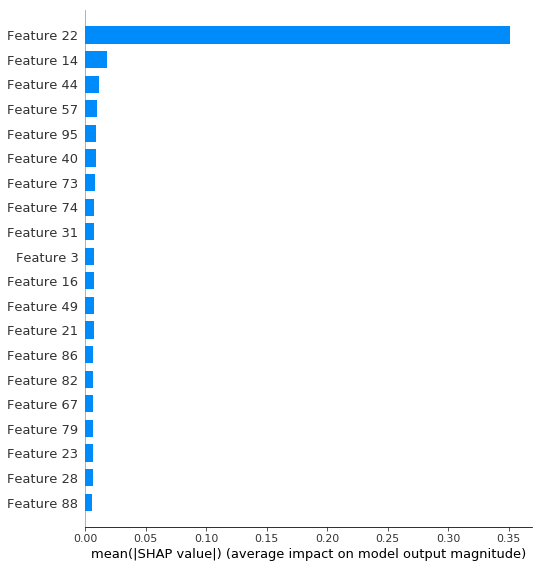

In [65]:
shap_values = shap.TreeExplainer(forReg).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

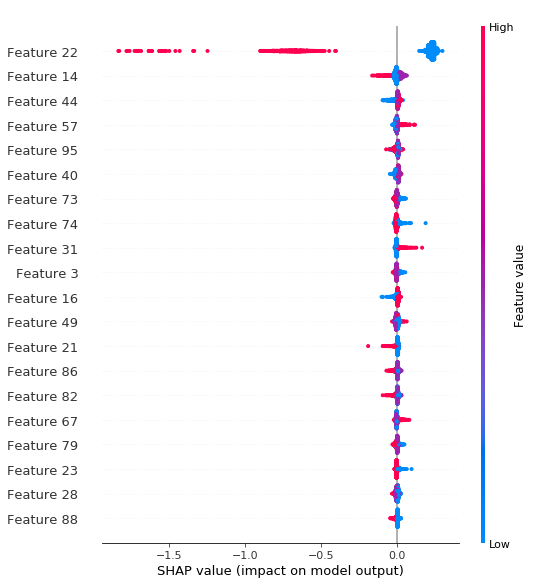

In [66]:
shap.summary_plot(shap_values,x_train)

In [72]:
def trait_simulation(samples_n, loci_m,var_g,var_e):
    f_M = np.random.uniform(0,1,loci_m)
    G = np.random.binomial(n=2,p = f_M, size = (samples_n,loci_m))
    G = preprocessing.scale(G, axis=0)
    loci =random.randint(0,loci_m-1)
    SNP = G[:,loci]
    individuals = len(SNP)
    mean = 0 
    sigma_b = sqrt(var_g)
    sigma_e = sqrt(var_e)
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1))
    for k in range(0, individuals):
        #each individual will have a random e_j(noise) value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    G = np.append(G, Y_n, axis=1)
    X = G[:,0:len(G[0])-2]
    y = G[:,len(G[0])-1]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linReg = LinearRegression()  
    linReg.fit(x_train, y_train) 
    explainer = shap.KernelExplainer(linReg.predict, x_train)
    shap_values = explainer.shap_values(x_train)
    print(x_train.shape)
    shap_values = shap_linear_regression(G)
    print(shap_feature_plot(shap_values))
    return shap_values,var_g,var_e

In [68]:
#Breaking into smaller functions
def simulate_genotype(samples_n, loci_m):
    f_M = np.random.uniform(0,1,loci_m)
    G = np.random.binomial(n=2,p = f_M, size = (samples_n,loci_m))
    G = preprocessing.scale(G, axis=0)
    return G

def simulate_genotype_and_phenotype(samples_n, loci_m,var_g,var_e):
    G = simulate_genotype(samples_n, loci_m)
    loci =random.randint(0,loci_m-1)
    SNP = G[:,loci]
    individuals = len(SNP)
    mean = 0 
    sigma_b = sqrt(var_g)
    sigma_e = sqrt(var_e)
    b_i = np.random.normal(0, sigma_b)
    Y_n = np.zeros((individuals, 1))
    for k in range(0, individuals):
        #each individual will have a random e_j(noise) value
        e_j = np.random.normal(0, sigma_e)
        #G_ij will be the jth individual from our SNP for the loci of choce
        G_ij  = SNP[k]
        Y_j = b_i*G_ij + e_j
        Y_n[k] = Y_j 
    H= var_g/(var_g+var_e)
    G = np.append(G, Y_n, axis=1)
    return G, loci

In [82]:
#Linear ML functions & SHAP
def shap_linear_regression(G):
    H= var_g/(var_g+var_e)
    X = G[:,0:len(G[0])-2]
    y = G[:,len(G[0])-1]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linReg = LinearRegression()  
    linReg.fit(x_train, y_train) 
    y_predict = linReg.predict(x_test)
    '''
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predict), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predict), 2)) 
    print("Root Mean squared error =", sqrt(round(sm.mean_squared_error(y_test, y_predict), 2)))
    print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predict), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predict), 2)) 
    print("R2 score =", round(sm.r2_score(y_test, y_predict), 2))
    '''
    root_mean_sqr = sqrt(round(sm.mean_squared_error(y_test, y_predict), 2))
    explainer = shap.KernelExplainer(linReg.predict, x_train)
    shap_values = explainer.shap_values(x_train)
    return shap_values, root_mean_sqr

def shap_feature_plot(shap_values):
    shap_values = shap.TreeExplainer(forReg).shap_values(x_train)
    shap.summary_plot(shap_values, x_train, plot_type="bar")
    
    
    
    

4



2.2869193252058544


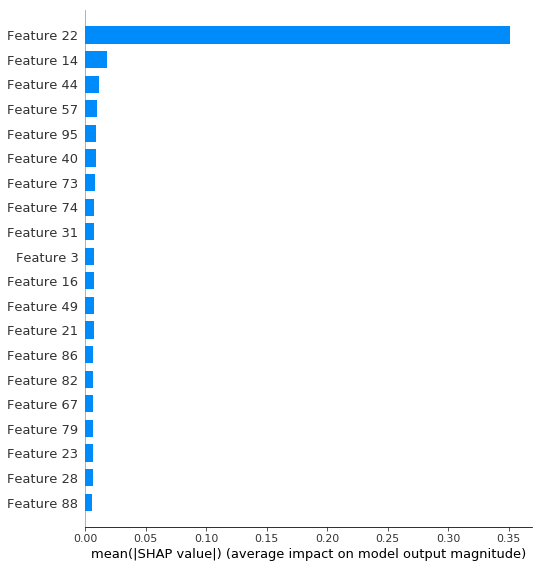

In [81]:
G, loci = simulate_genotype_and_phenotype(30,5, .4, .5)
print(loci)
shap_values, root_mean_sqr = shap_linear_regression(G)
print(root_mean_sqr)
shap_feature_plot(shap_values)


(21, 4)


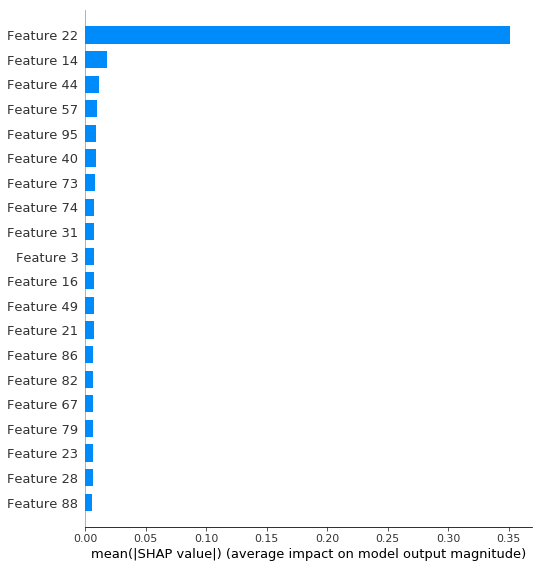

Mean absolute error = 0.44
Mean squared error = 0.32
Root Mean squared error = 0.565685424949238
Median absolute error = 0.38
Explain variance score = 0.37
R2 score = 0.37
None


In [75]:
import warnings
warnings.filterwarnings('ignore')
shap_values,var_g,var_e = trait_simulation(30,5,.4,.5)

In [ ]:
def linear_regression_vs_noise(samples_n, loci_m,var_g,var_e, number_of_trials):


In [ ]:
def avg_shap_values(samples_n, loci_m,var_g,var_e, number_of_trials):
    for trail in number_of_trials:
        shap_values,var_g,var_e = trait_simulation(samples_n, loci_m,var_g,var_e)